In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

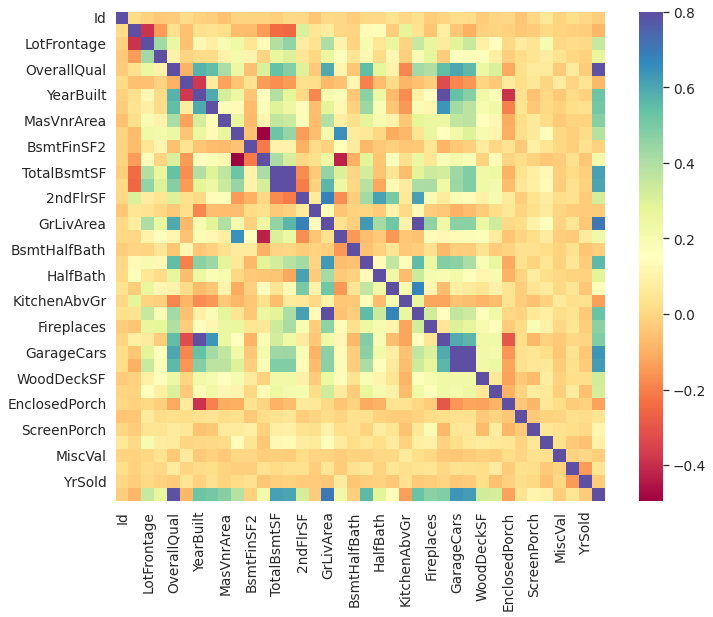

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, cmap="Spectral", square=True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

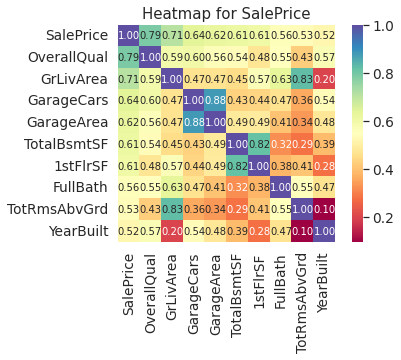

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, cmap="Spectral", square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Heatmap for SalePrice')
plt.savefig('heatmap.jpg')
files.download('heatmap.jpg')
plt.show()

In [ ]:

y_train = train['SalePrice']
test_id = test['Id']
all_data = pd.concat([train, test], axis=0, sort=False)
all_data = all_data.drop(['Id', 'SalePrice'], axis=1)

Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())

total = all_data.isnull().sum().sort_values(ascending=False)
total.head(20)

numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)


categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])


all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data.drop(['Utilities'], axis=1, inplace=True)

all_data.isnull().sum().max() #just checking that there's no missing data missing...

all_data = pd.get_dummies(all_data)
all_data.head()

x_train = all_data[:len(y_train)]
x_test = all_data[len(y_train):]

4


In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(x_train, y_train)

y_test_hat = clf.predict(x_test)


lst  = list(zip(test_id, y_test_hat))
df_predictions_lreg = pd.DataFrame(lst, columns = ['Id', 'SalePrice'])
df_predictions_lreg.to_csv('kagglesubmission_random_reg.csv', index=False)
files.download('kagglesubmission_random_reg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 1000, max_depth=10)
rf_reg.fit(x_train, y_train)
y_test_hat = rf_reg.predict(x_test)



# using model to predict test.csv prices

predicted_prices = y_test_hat
lst  = list(zip(test_id, predicted_prices))
df_predictions_lreg = pd.DataFrame(lst, columns = ['Id', 'SalePrice'])
#df_predictions_lreg.to_csv('kagglesubmission_random_reg.csv', index=False)
#files.download('kagglesubmission_random_reg.csv')

In [ ]:
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)
X_train_red = x_train.iloc[:,lasso_model.coef_!=0]
X_test_red = x_test.iloc[:,lasso_model.coef_!=0]

lasso_reg = Lasso().fit(X_train_red, y_train)
predictions = lasso_reg.predict(X_test_red)

print(lasso_model.alpha_)

for feature, coef in zip(x_train.columns,lasso_model.coef_):
    print(f"The magniture of the feature coefficient for {feature} is {abs(coef)}.")

predicted_prices = y_test_hat
lst  = list(zip(test_id, predicted_prices))
df_predictions_lreg = pd.DataFrame(lst, columns = ['Id', 'SalePrice'])
df_predictions_lreg.to_csv('lasso_reg.csv', index=False)
#files.download('lasso_reg.csv')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1972076766.4420166, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129372501264.26971, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288494926305.08716, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarn

1.0
The magniture of the feature coefficient for MSSubClass is 7.693656360738548.
The magniture of the feature coefficient for LotArea is 0.6922974087559318.
The magniture of the feature coefficient for OverallQual is 8052.38817774792.
The magniture of the feature coefficient for OverallCond is 5400.059622920761.
The magniture of the feature coefficient for YearBuilt is 332.1169682488938.
The magniture of the feature coefficient for YearRemodAdd is 108.68738782337017.
The magniture of the feature coefficient for BsmtFinSF1 is 31.23548828039637.
The magniture of the feature coefficient for BsmtFinSF2 is 18.47475074674102.
The magniture of the feature coefficient for BsmtUnfSF is 9.160249337152957.
The magniture of the feature coefficient for TotalBsmtSF is 5.824906530056495.
The magniture of the feature coefficient for 1stFlrSF is 47.2743683902609.
The magniture of the feature coefficient for 2ndFlrSF is 62.32808343851189.
The magniture of the feature coefficient for LowQualFinSF is 17.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

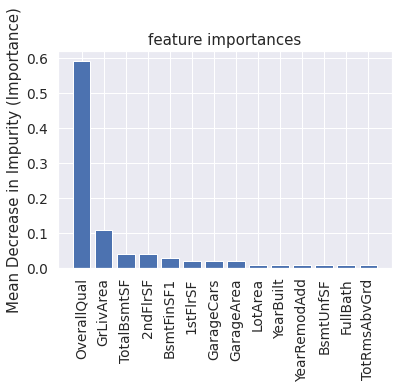

(0.59, 0.11, 0.04, 0.04, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)


In [ ]:
features_list = list(x_train.columns)
importances = list(rf_reg.feature_importances_)

labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]


labeled_importances = sorted(
    labeled_importances,
    key=lambda t: t[1],
    reverse = True
)

features, importances = zip(*labeled_importances)
indices = range(len(importances[0:14]))

plt.bar(indices, importances[0:14], orientation = 'vertical')
plt.title('feature importances')
plt.xticks(indices, features, rotation='vertical')
plt.ylabel('Mean Decrease in Impurity (Importance)', fontsize=15)
plt.savefig('feature_imp.jpg')
files.download('feature_imp.jpg')
plt.show()

print(importances[0:14])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

0.8511889232487488 0.1399201564497056


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

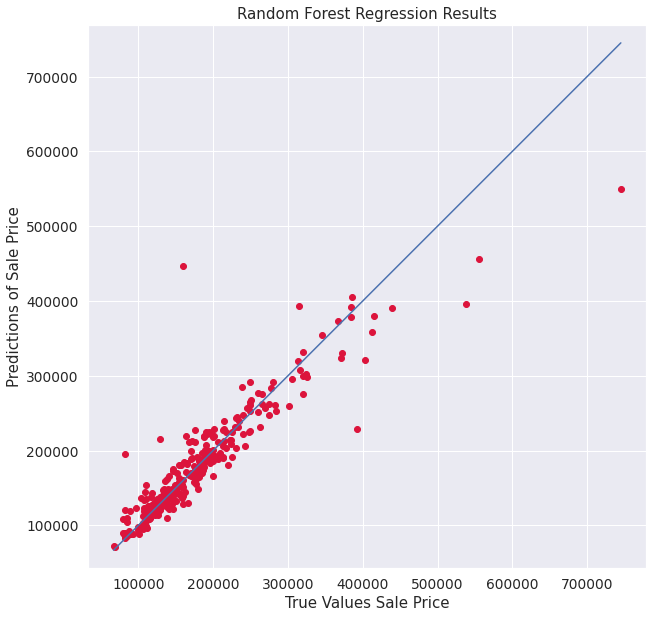

In [ ]:
rf_reg.fit(X_train, y_train)
y_test_hat = rf_reg.predict(X_test)

#R^2 and explained variance metric
r2 = r2_score(y_test,y_test_hat)
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_test_hat)))
print(r2, rmse)


true_value = y_test
predicted_value = y_test_hat

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values Sale Price', fontsize=15)
plt.ylabel('Predictions of Sale Price', fontsize=15)
plt.axis('equal')
plt.title('Random Forest Regression Results')
plt.savefig('rf_line.jpg')
files.download('rf_line.jpg')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+11, tolerance: 7.191e+08
  model = cd_fast.enet_coordinate_descent(


0.6004883633300744 0.2899646656786777


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

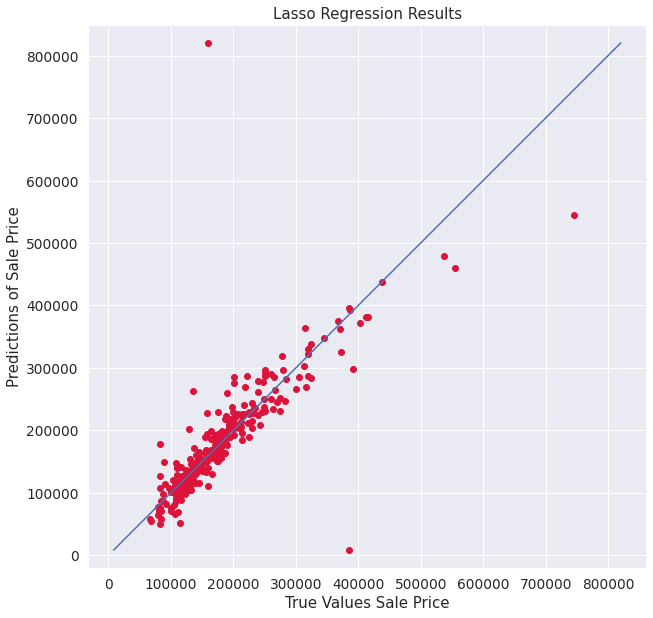

In [ ]:
X_train_red = X_train.iloc[:,lasso_model.coef_!=0]
X_test_red = X_test.iloc[:,lasso_model.coef_!=0]

lasso_reg = Lasso().fit(X_train_red, y_train)
predictions = lasso_reg.predict(X_test_red)

mse_lasso_regression = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(predictions)))
print(r2, rmse)


true_value = y_test
predicted_value = predictions

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values Sale Price', fontsize=15)
plt.ylabel('Predictions of Sale Price', fontsize=15)
plt.axis('equal')
plt.title('Lasso Regression Results')
plt.savefig('lasso_line.jpg')
files.download('lasso_line.jpg')
plt.show()

In [ ]:
X_train_red.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=201)